# Importing Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the data

In [11]:
df = pd.read_csv("../data/BlackFriday.csv")


In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [14]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [15]:
del df['Product_Category_2']
del df['Product_Category_3']

In [16]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# Analyzing data

In [17]:
df['User_ID'].nunique()

5891

In [18]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [19]:
df["Product_ID"].nunique()

3623

In [20]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [21]:
df['Gender'].nunique()

2

In [22]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
df['Age'].nunique()

7

In [24]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
df['Occupation'].nunique()

21

In [26]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [27]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [28]:
df['City_Category'].value_counts()

City_Category
B    226493
C    166446
A    144638
Name: count, dtype: int64

In [29]:
df['Marital_Status'].value_counts()

Marital_Status
0    317817
1    219760
Name: count, dtype: int64

In [30]:
print("Number of Unique records in each column")
for column in df.columns:
    print(f'{column} : {df[column].nunique()}')

Number of Unique records in each column
User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [31]:
df.groupby('User_ID')['Purchase'].sum()

User_ID
1000001     333481
1000002     810353
1000003     341635
1000004     205987
1000005     821001
            ...   
1006036    3821666
1006037    1075037
1006038      80859
1006039     554504
1006040    1562615
Name: Purchase, Length: 5891, dtype: int64

# Analyzing the Gender Column

In [32]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [33]:
df['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

In [34]:
counts=df['Gender'].value_counts()

In [35]:
counts.index

Index(['M', 'F'], dtype='object', name='Gender')

In [36]:
counts.values

array([405380, 132197])

In [37]:
type(counts)

pandas.core.series.Series

Text(0.5, 1.0, 'Percentage of Male and Female ')

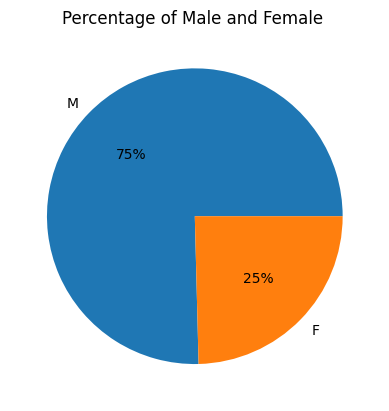

In [38]:
plt.pie(counts.values,labels=counts.index,autopct="%.0f%%")
plt.title("Percentage of Male and Female ")

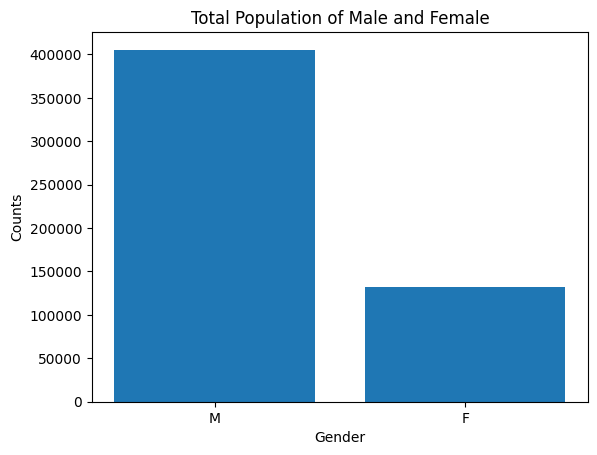

In [39]:

plt.bar(counts.index, counts.values)
plt.ylabel("Counts")
plt.xlabel("Gender")
plt.title("Total Population of Male and Female")
plt.show()

Text(0.5, 1.0, 'Total Money spending of Male and Female')

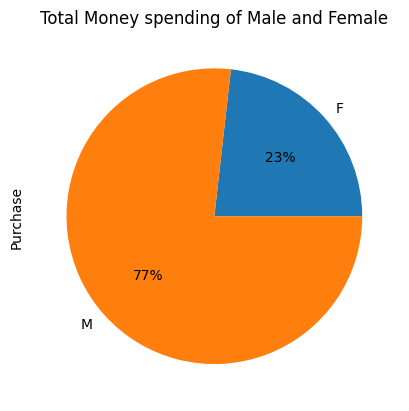

In [40]:
df.groupby("Gender")['Purchase'].sum().plot(kind='pie',autopct='%.0f%%')
plt.title("Total Money spending of Male and Female")

Text(0.5, 1.0, 'Average spending of Male and Female')

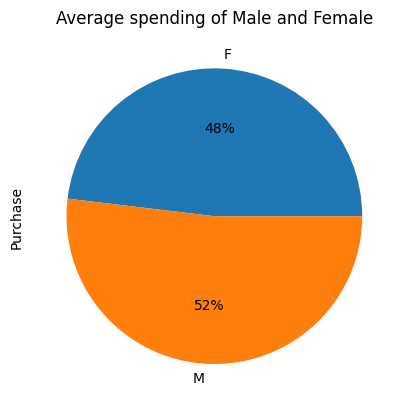

In [41]:
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct='%.0f%%')
plt.title("Average spending of Male and Female")

# Analysis on Age and Marital status

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [43]:
df['Age'].value_counts()

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

In [44]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

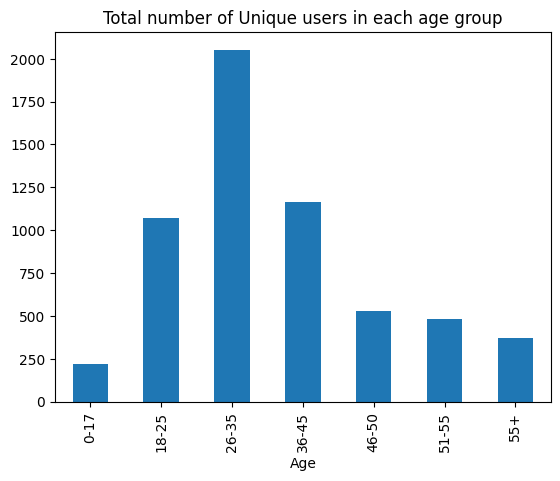

In [76]:
df.groupby("Age")["User_ID"].nunique().plot(kind="bar")
plt.title("Total number of Unique users in each age group")
plt.show()

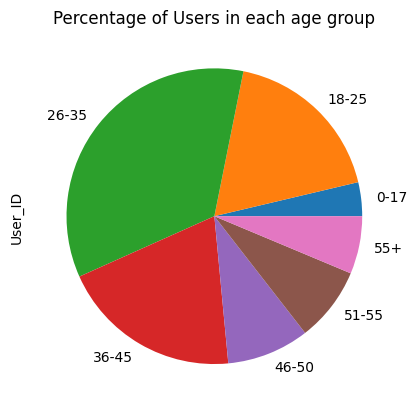

In [77]:
df.groupby("Age")["User_ID"].nunique().plot(kind="pie")
plt.title("Percentage of Users in each age group")
plt.show()

In [47]:
df.groupby('Age')['Product_ID'].unique()

Age
0-17     [P00069042, P00248942, P00087842, P00085442, P...
18-25    [P00366542, P00190742, P00151842, P00112642, P...
26-35    [P00193542, P00274942, P00251242, P00014542, P...
36-45    [P00036842, P00085942, P00118742, P00297942, P...
46-50    [P00184942, P00346142, P0097242, P00129542, P0...
51-55    [P00231342, P00190242, P0096642, P00058442, P0...
55+      [P00285442, P00117442, P00322042, P00216342, P...
Name: Product_ID, dtype: object

In [48]:
age_df=pd.DataFrame(df.groupby('Age')['Product_ID'].nunique())
age_df

,Product_ID
Age,
0-17,2300
18-25,3213
26-35,3419
36-45,3318
46-50,3099
51-55,2877
55+,2573


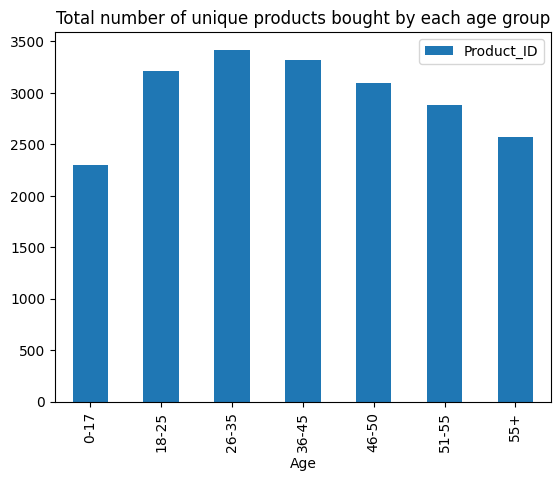

In [80]:
age_df.plot(kind='bar')
plt.title('Total number of unique products bought by each age group')
plt.show()

# Multi Column Analysis

In [50]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


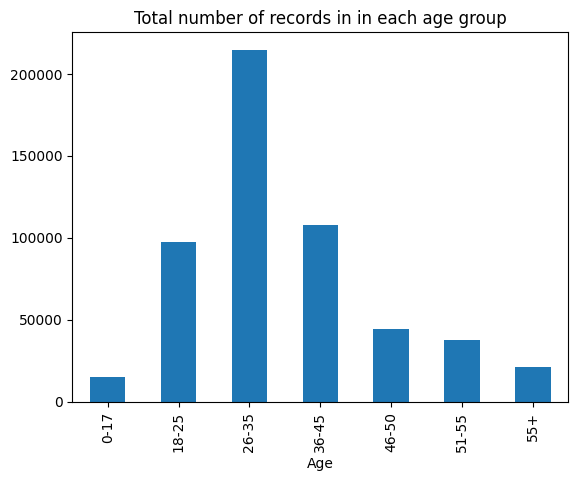

In [81]:
df.groupby('Age').size().plot(kind="bar")
plt.title('Total number of records in in each age group')
plt.show()

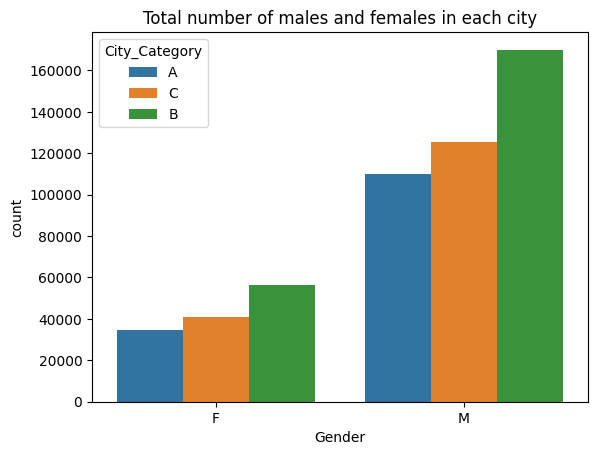

In [82]:
sns.countplot(x='Gender',hue='City_Category',data=df)
plt.title('Total number of males and females in each city')
plt.show()

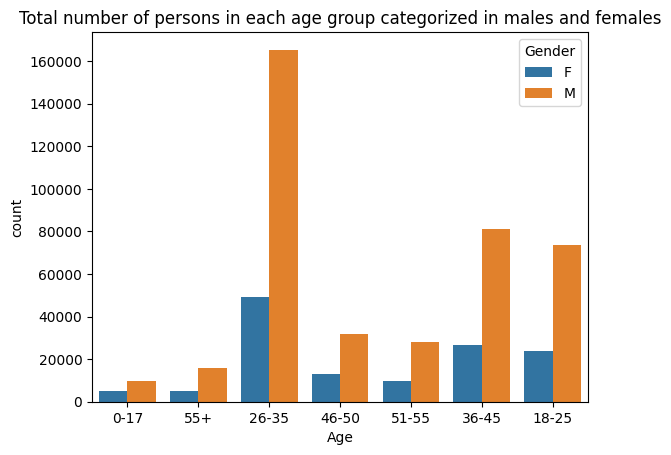

In [83]:
sns.countplot(x='Age',hue='Gender',data=df)
plt.title('Total number of persons in each age group categorized in males and females')
plt.show()


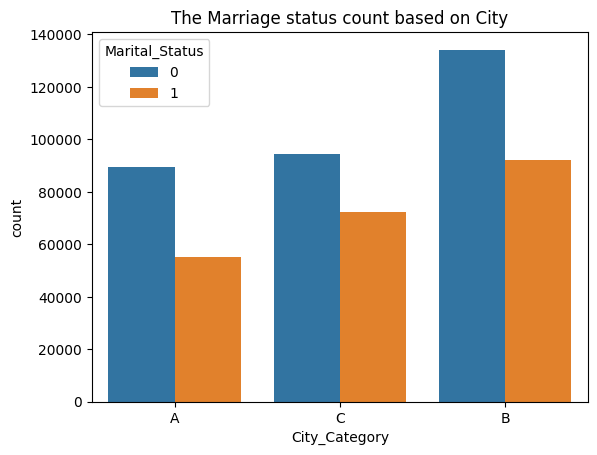

In [87]:
sns.countplot(x='City_Category',hue='Marital_Status',data=df)
plt.title('The Marriage status count based on City')
plt.show()

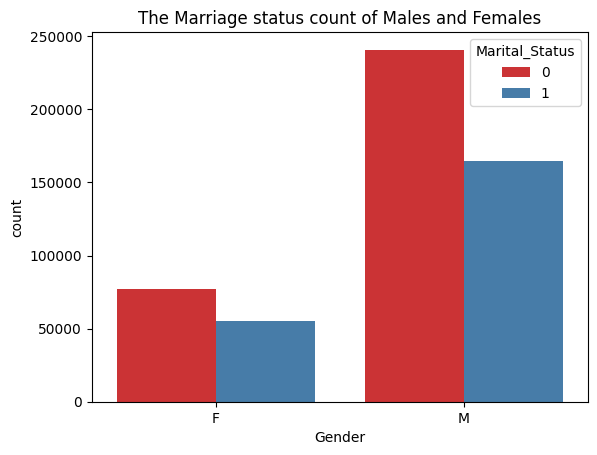

In [86]:
sns.countplot(x='Gender',hue='Marital_Status',data=df,palette="Set1")
plt.title('The Marriage status count of Males and Females')
plt.show()

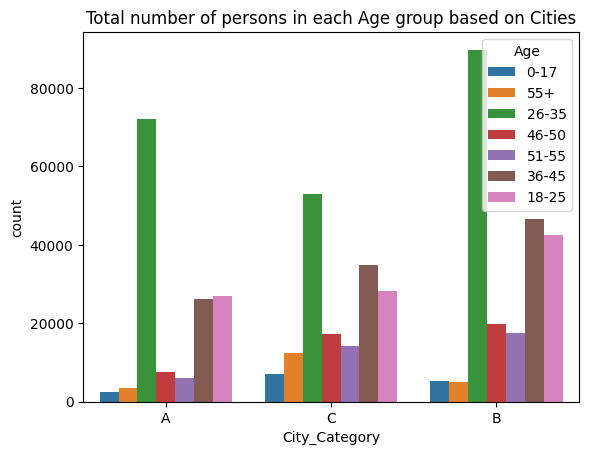

In [88]:
sns.countplot(x='City_Category',hue='Age',data=df)
plt.title('Total number of persons in each Age group based on Cities')
plt.show()

# Occupation and Production Analysis

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [59]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [60]:
df['Stay_In_Current_City_Years'].nunique()

5

In [61]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     189192
2      99459
3      93312
4+     82889
0      72725
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25032\2813105433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Stay_In_Current_City_Years'],palette="Set1")


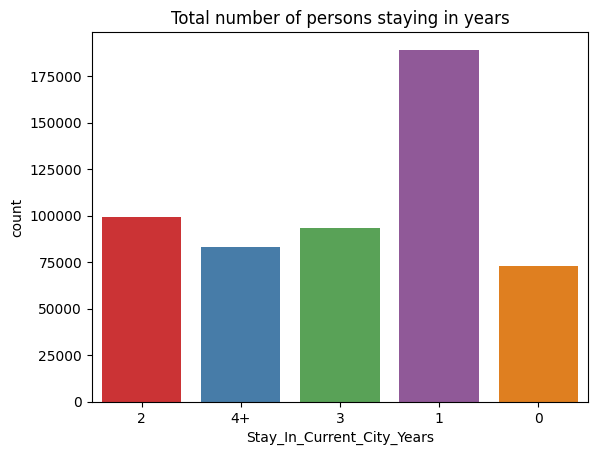

In [93]:
sns.countplot(x=df['Stay_In_Current_City_Years'],palette="Set1")
plt.title('Total number of persons staying in years')
plt.show()

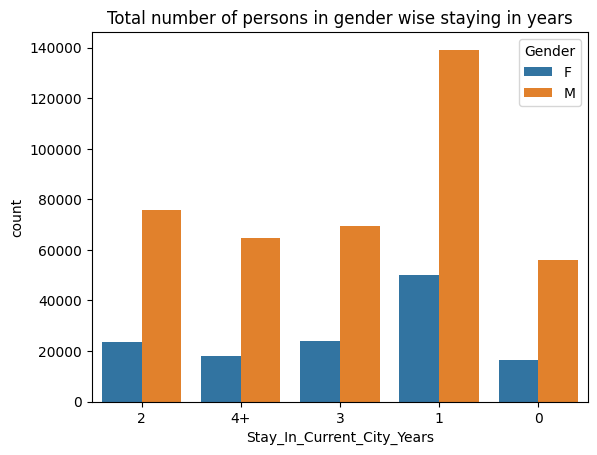

In [91]:
sns.countplot(x='Stay_In_Current_City_Years',hue="Gender",data=df)
plt.title('Total number of persons in gender wise staying in years')
plt.show()

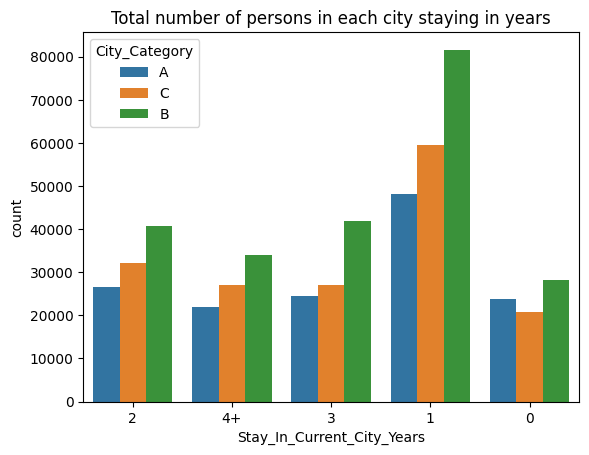

In [92]:
sns.countplot(x='Stay_In_Current_City_Years',hue="City_Category",data=df)
plt.title('Total number of persons in each city staying in years')
plt.show()

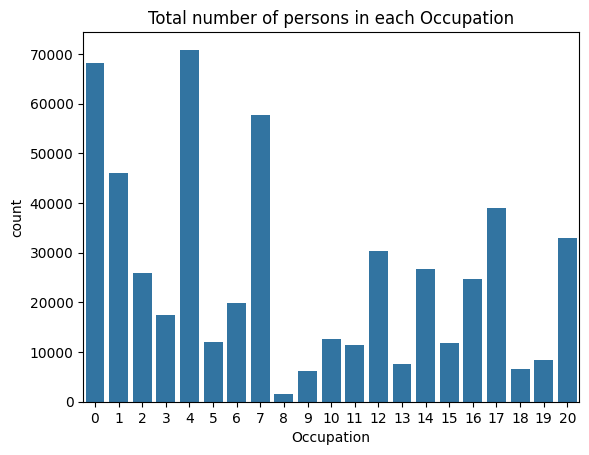

In [94]:
sns.countplot(x=df['Occupation'])
plt.title('Total number of persons in each Occupation')
plt.show()

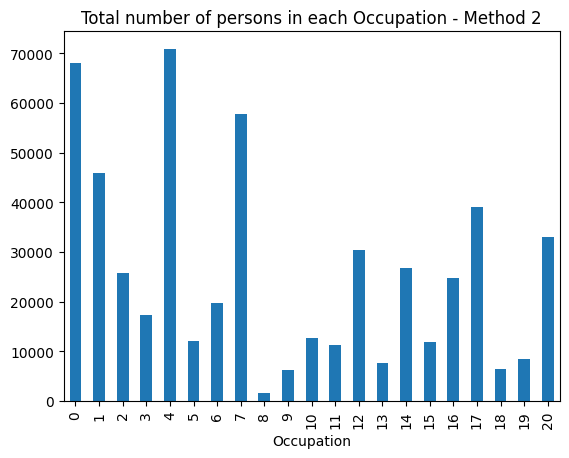

In [96]:
df.groupby('Occupation').size().plot(kind='bar')
plt.title('Total number of persons in each Occupation - Method 2')
plt.show()

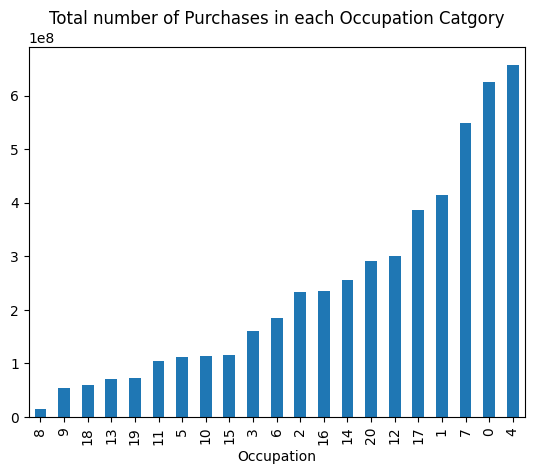

In [97]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')
plt.title('Total number of Purchases in each Occupation Catgory')
plt.show()

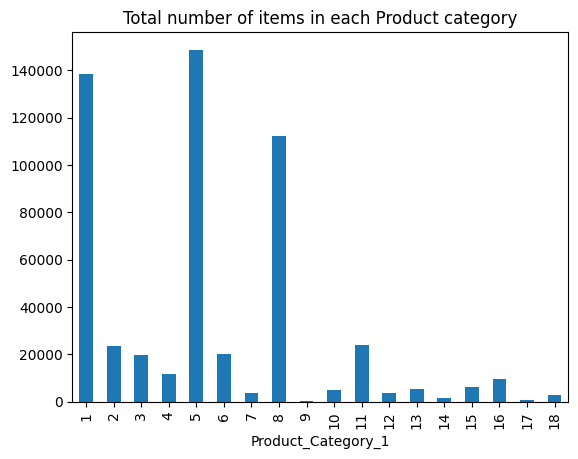

In [98]:
df.groupby('Product_Category_1').size().plot(kind='bar')
plt.title('Total number of items in each Product category')
plt.show()

# Combining Gender and Marital Status Analysis

In [69]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [70]:
lst=[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
df["Gender_Marital"]=lst

In [71]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


In [72]:
df["Gender_Marital"].value_counts()

Gender_Marital
M_0    240843
M_1    164537
F_0     76974
F_1     55223
Name: count, dtype: int64

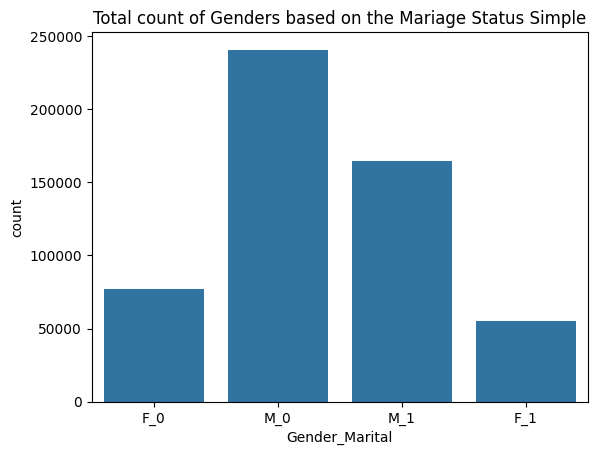

In [99]:
sns.countplot(x=df['Gender_Marital'])
plt.title('Total count of Genders based on the Mariage Status Simple')
plt.show()

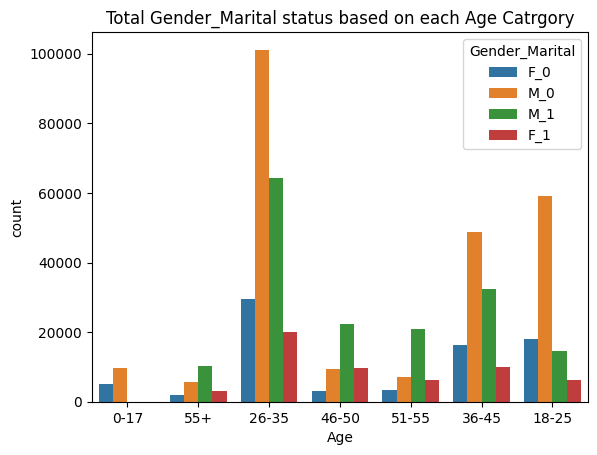

In [100]:
sns.countplot(x='Age',hue='Gender_Marital',data=df)
plt.title('Total Gender_Marital status based on each Age Catrgory')
plt.show()